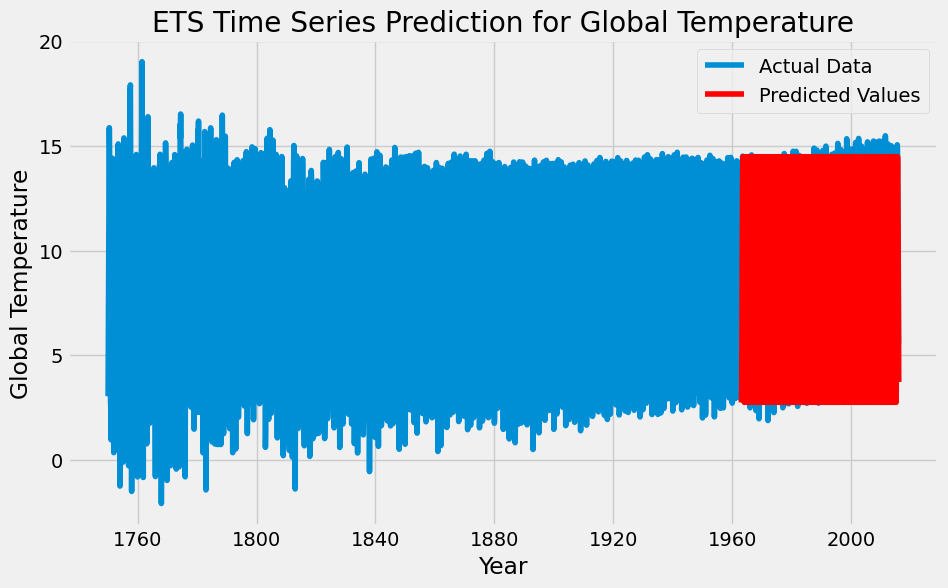

Mean Absolute  Error: 0.4787
Mean Squared Error: 0.3591
Root Mean Squared Error: 0.5992


In [44]:
####For Global Temperature
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


df=pd.read_csv('GlobalTemperatures.csv')
df = df[['dt', 'LandAverageTemperature']]
df = df.dropna()
df["dt"] = pd.to_datetime(df["dt"])



# Split the data into train and test sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]['LandAverageTemperature']
test_data = df[train_size:]['LandAverageTemperature']
test_data_date = df[train_size:]['dt']
first_date_value = test_data_date.iloc[0]

# Fit the ETS model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
result = model.fit()

# Make predictions for the test set
predictions = result.forecast(len(test_data))

#test_data.index = pd.date_range(start='1880-07-15', periods=len(test_data), freq='Y')
test_data.index = pd.date_range(start=first_date_value, periods=len(test_data), freq='M')
# Plot the actual data and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['dt'], df['LandAverageTemperature'], label='Actual Data')
plt.plot(test_data.index, predictions, label='Predicted Values', color='red')
#plt.plot(df['date'], predictions, label='Predicted Values', color='red')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Global Temperature')
plt.title('ETS Time Series Prediction for Global Temperature')
plt.show()


mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute  Error: {mae:.4f}")

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")



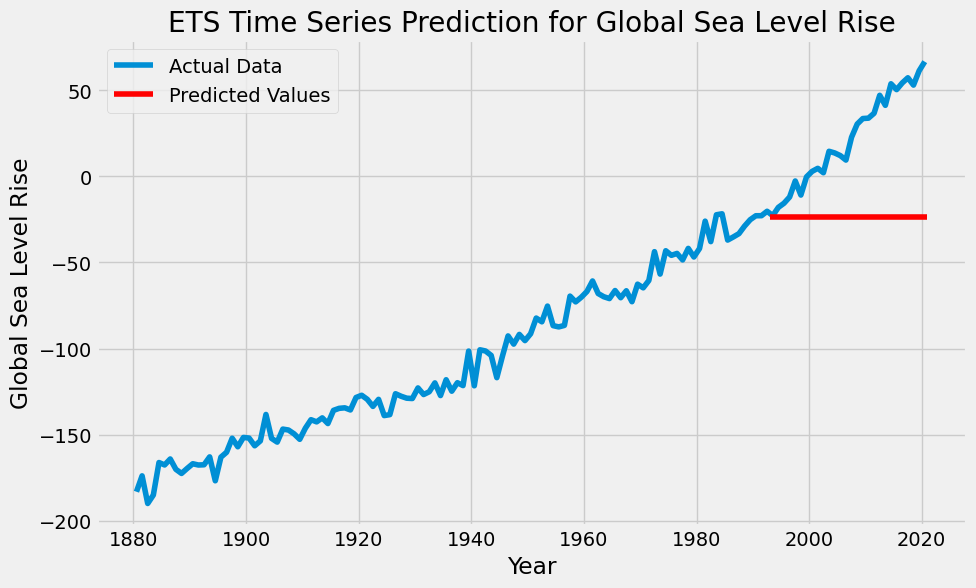

Mean Absolute  Error: 44.4459
Mean Squared Error: 2724.7066
Root Mean Squared Error: 52.1987


In [42]:
####For sea level rise
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


df=pd.read_csv('Global_sea_level_rise.csv')
df = df[['date', 'mmfrom1993-2008average']]
df = df.dropna()
df["date"] = pd.to_datetime(df["date"])



# Split the data into train and test sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]['mmfrom1993-2008average']
test_data = df[train_size:]['mmfrom1993-2008average']
test_data_date = df[train_size:]['date']
first_date_value = test_data_date.iloc[0]

# Fit the ETS model
model = ExponentialSmoothing(train_data)
result = model.fit()

# Make predictions for the test set
predictions = result.forecast(len(test_data))

#test_data.index = pd.date_range(start='1880-07-15', periods=len(test_data), freq='Y')
test_data.index = pd.date_range(start=first_date_value, periods=len(test_data), freq='Y')
# Plot the actual data and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['mmfrom1993-2008average'], label='Actual Data')
plt.plot(test_data.index, predictions, label='Predicted Values', color='red')
#plt.plot(df['date'], predictions, label='Predicted Values', color='red')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Global Sea Level Rise')
plt.title('ETS Time Series Prediction for Global Sea Level Rise')
plt.show()


mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute  Error: {mae:.4f}")

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")


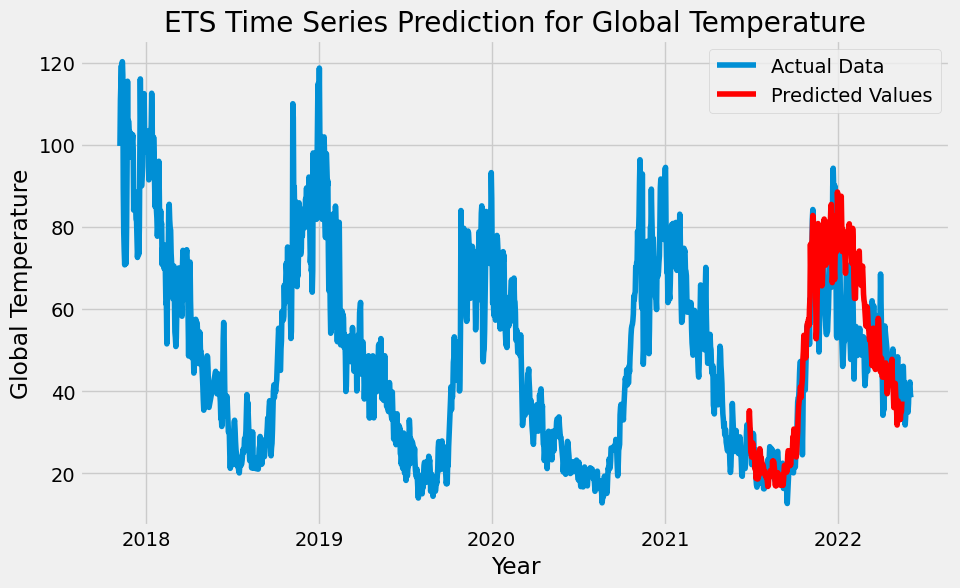

Mean Absolute  Error: 8.3773
Mean Squared Error: 131.0698
Root Mean Squared Error: 11.4486


In [54]:
####For AirQuality
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


df=pd.read_csv('air-quality-india.csv')
df = df[['Timestamp', 'PM2.5']]
df = df.dropna()
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df['Timestamp'] = df['Timestamp'].dt.date

df=pd.DataFrame(df.groupby('Timestamp')['PM2.5'].mean()).reset_index()
df.head()

# Split the data into train and test sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]['PM2.5']
test_data = df[train_size:]['PM2.5']
test_data_date = df[train_size:]['Timestamp']
first_date_value = test_data_date.iloc[0]

# Fit the ETS model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=365)
result = model.fit()

# Make predictions for the test set
predictions = result.forecast(len(test_data))


test_data.index = pd.date_range(start=first_date_value, periods=len(test_data), freq='D')
# Plot the actual data and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['PM2.5'], label='Actual Data')
plt.plot(test_data.index, predictions, label='Predicted Values', color='red')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Global Temperature')
plt.title('ETS Time Series Prediction for Air Quality')
plt.show()
mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute  Error: {mae:.4f}")

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")





In [ ]:
## Forest Cover

